# Include

In [2]:
include("Trimer script new.jl")

VacuumStateFluctuations (generic function with 1 method)

Getting the relevant subspace from generic k point

In [3]:
A_dict = CreateA_dict() 
J = 0.4 # Generic value
k = [3.0,4.5] # Generic value
full_anomalous = CreateAnomalousBB(A_dict, J, k) + CreateAnomalousAB(A_dict, J, k)
full_normal = CreateNormalBB(A_dict, J, k) + CreateNormalAB(A_dict, J, k)
rel_space = find_subspace_D(full_anomalous,full_normal)

34-element Vector{Int64}:
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
 21
 22
 23
  ⋮
 36
 37
 38
 39
 40
 41
 42
 43
 44
 64
 65
 66

# Fluctuations

## Grid

In [3]:
A_dict = CreateA_dict()
J = 0.0
N = 20

alpha_values =  range(0.0, 0.1, 15)  # Values for alpha
beta_values = range(0.0, 0.1, 15)   # Values for beta

# Initialize 2D arrays for energies
exp_A_grid = zeros(Float64, length(beta_values), length(alpha_values))
exp_B_grid = zeros(Float64, length(beta_values), length(alpha_values))



for (i, beta) in enumerate(beta_values)
    for (j, alpha) in enumerate(alpha_values)
        try
            exp_A_grid[i, j], exp_B_grid[i, j] = VacuumStateFluctuations(
                A_dict,
                J,
                ind_vec = rel_space,
                N = N,
                alpha = alpha,
                beta = beta
            )
        catch            
            exp_A_grid[i, j] = NaN
            exp_B_grid[i, j] = NaN
            
        end
    end
end



## Angle

In [4]:
A_dict = CreateA_dict()
J = 0.0
N = 20
r = 0.1 # Radius 
theta_vec = range(0.45, 0.5, length = 20) # Angle values


# Initialize 2D arrays for energies
exp_A = zeros(Float64, length(theta_vec))
exp_B = zeros(Float64, length(theta_vec))



for (i, theta) in enumerate(theta_vec)
    alpha_val = r*cos(theta)
    beta = r*sin(theta)
    try
        exp_A[i], exp_B[i] = VacuumStateFluctuations(
            A_dict,
            J,
            ind_vec = rel_space,
            N = N,
            alpha = alpha_val,
            beta = beta
        )
    catch            
        exp_A[i] = NaN
        exp_B[i] = NaN
            
    end
end



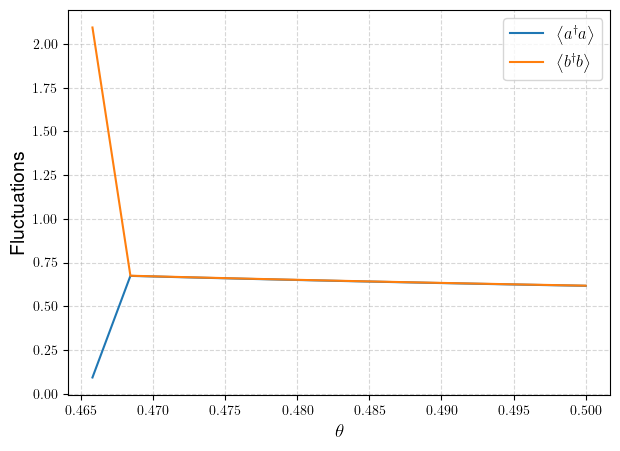

In [5]:
fig, ax = subplots(figsize=(7, 5))
ax.plot(theta_vec, exp_A, label=L"$\left< a^\dagger a \right>$")
ax.plot(theta_vec, exp_B, label=L"$\left< b^\dagger b \right>$")
ax.set_xlabel(L"$\theta$", fontsize=14)
ax.set_ylabel("Fluctuations", fontsize=14)
# ax.set_title("Fluctuations for "*L"$\alpha =$"*"$alpha_val ,"*L"$J =$"*"$J", fontsize=16)
ax.grid(true, linestyle="--", alpha=0.5)
ax.legend(fontsize=12, loc="upper right")
display(fig)

# Optionally save the figure
# savefig("E_path_full_disp_vs_index.pdf", bbox_inches="tight")
close(fig)


## Different radii only for fluct B

Small radii

In [6]:
A_dict = CreateA_dict()
J = 0.0
N = 20
r_vec = range(0.01, 0.1, length = 20)
theta_vec = range(0.44, 0.47, length = 10) # Angle values


# Initialize 2D arrays for energies
exp_A_grid = zeros(Float64, length(r_vec), length(theta_vec))
exp_B_grid = zeros(Float64, length(r_vec), length(theta_vec))



for (i,r) in enumerate(r_vec)
    for (j, theta) in enumerate(theta_vec)
        alpha_val = r*cos(theta)
        beta = r*sin(theta)
        try
            exp_A_grid[i,j], exp_B_grid[i,j] = VacuumStateFluctuations(
                A_dict,
                J,
                ind_vec = rel_space,
                N = N,
                alpha = alpha_val,
                beta = beta
            )
        catch            
            exp_A_grid[i,j] = NaN
            exp_B_grid[i,j] = NaN
                
        end
    end
end


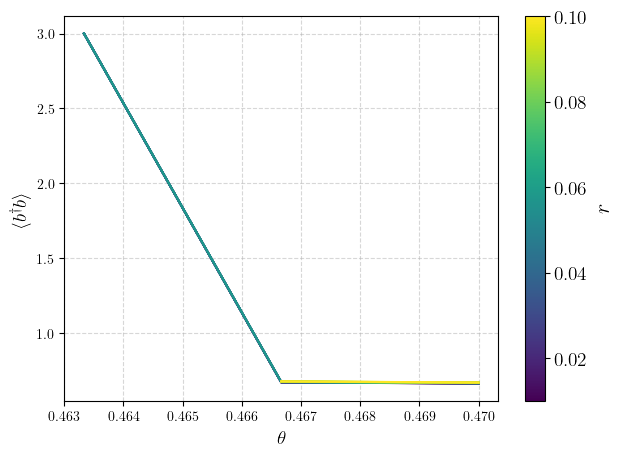

In [15]:
fig, ax = subplots(figsize=(7, 5))

# Choose a colormap
cmap = get_cmap("viridis")
norm_r = PyPlot.matplotlib.colors.Normalize(vmin=minimum(r_vec), vmax=maximum(r_vec))

for (i, r) in enumerate(r_vec)
    color = cmap(norm_r(r))
    ax.plot(theta_vec, exp_B_grid[i, :], color=color)
end

ax.set_xlabel(L"$\theta$", fontsize=14)
ax.set_ylabel(L"$\langle b^\dagger b \rangle$", fontsize=14)
ax.grid(true, linestyle="--", alpha=0.5)

sm = PyPlot.cm.ScalarMappable(cmap=cmap, norm=norm_r)
sm.set_array(r_vec)
# cbar = fig.colorbar(sm, ax=ax, label=L"$r$", orientation="vertical",fontsize=12)
cbar = fig.colorbar(sm, ax=ax, label=L"$r$", orientation="vertical")
cbar.ax.tick_params(labelsize=14)  # Set tick label font size
cbar.set_label(L"$r$", fontsize=16)  # Set colorbar label font size
display(fig)
close(fig)

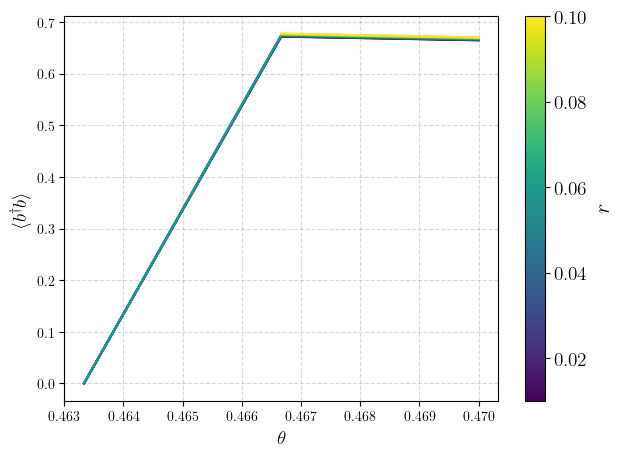

In [16]:
fig, ax = subplots(figsize=(7, 5))

# Choose a colormap
cmap = get_cmap("viridis")
norm_r = PyPlot.matplotlib.colors.Normalize(vmin=minimum(r_vec), vmax=maximum(r_vec))

for (i, r) in enumerate(r_vec)
    color = cmap(norm_r(r))
    ax.plot(theta_vec, exp_A_grid[i, :], color=color)
end

ax.set_xlabel(L"$\theta$", fontsize=14)
ax.set_ylabel(L"$\langle b^\dagger b \rangle$", fontsize=14)
ax.grid(true, linestyle="--", alpha=0.5)

sm = PyPlot.cm.ScalarMappable(cmap=cmap, norm=norm_r)
sm.set_array(r_vec)
# cbar = fig.colorbar(sm, ax=ax, label=L"$r$", orientation="vertical",fontsize=12)
cbar = fig.colorbar(sm, ax=ax, label=L"$r$", orientation="vertical")
cbar.ax.tick_params(labelsize=14)  # Set tick label font size
cbar.set_label(L"$r$", fontsize=16)  # Set colorbar label font size
display(fig)
close(fig)

Larger radii

In [ ]:
A_dict = CreateA_dict()
J = 0.0
N = 20
r_vec_large = range(0.1, 1.0, length = 20)
theta_vec = range(0.44, 0.47, length = 10) # Angle values


# Initialize 2D arrays for energies
exp_A_grid_large = zeros(Float64, length(r_vec_large), length(theta_vec))
exp_B_grid_large = zeros(Float64, length(r_vec_large), length(theta_vec))



for (i,r) in enumerate(r_vec_large)
    for (j, theta) in enumerate(theta_vec)
        alpha_val = r*cos(theta)
        beta = r*sin(theta)
        try
            exp_A_grid_large[i,j], exp_B_grid_large[i,j] = VacuumStateFluctuations(
                A_dict,
                J,
                ind_vec = rel_space,
                N = N,
                alpha = alpha_val,
                beta = beta
            )
        catch            
            exp_A_grid_large[i,j] = NaN
            exp_B_grid_large[i,j] = NaN
                
        end
    end
end
